In [28]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../../../plotMithraPy')
import plotMiFuncs as pmf
import numpy as np
# To make plot backgrounds white
import matplotlib as mpl
mpl.rcParams["figure.facecolor"] = "white"
mpl.rcParams["axes.facecolor"] = "white"
mpl.rcParams["savefig.facecolor"] = "white"
import matplotlib.pyplot as plt
import pandas as pd
import os 
sys.path.append('/home/arnau/documents/ETHZ/Semester_Project_Master_Thesis/pyOPALTools')
from opal.parser.H5Parser import H5Parser
from decimal import Decimal
from scipy.signal import find_peaks

########################
for_report = False
generic_fn = '/und'
fs = 14
########################

params = pd.read_csv('cases.txt', sep = ' ', comment = '#')
print(params)

def strParam(row):
    text = ''
    text += row['case'] + ', '
    if row['dz'] > 100:
        text += 'OPAL\n'
    else:
        text += 'MITHRA, $dz = $' + str(int(row['dz'])) + '$\mu$m\n'
    if row['K'] > 0:
        text += 'before und'
    else:
        text += 'before drift'
    text += ', N =  ' + str(int(row['N'] / 1e5)) + 'e5'
    return text

if not for_report:
    from datetime import date
    today = date.today()
    footnote = 'A.Albà, ' + str(today) + '\ndir: /' + (os.path.split(os.getcwd()))[1]
else:
    footnote = " "

pltpath = 'plots'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
        case    dz      K          N
0     case-2     1   0.00   100000.0
1     case-3     1   0.00   800000.0
2     case-1     2   0.00   100000.0
3      case0     4   0.00   100000.0
4      case1     8   0.00   100000.0
5      case2    16   0.00   100000.0
6   caseOPAL  2222   0.00   100000.0
7      case4     4  10.81   100000.0
8      case8     4  10.81   100000.0
9      case9     4  10.81   100000.0
10     case3     4  10.81   800000.0
11     case5     4  10.81  3200000.0
12     case7     4  10.81  3200000.0
13     case6     2  10.81  6400000.0


In [3]:
def reduceX(x, redF):
    d = []
    for i in range(len(x)):
        if np.random.rand() > 1 / redF:
            d.append(i)
    x = np.delete(x, d)
    return [x,d]

def get_screen_xy( fn_prefix, screen_name, qx, qy, show = False, reduce_factor = 1 ):    
    ''' 
    Get data to plot from file fn and given screen. qx and qy are arrays of strings with data to plot
    eg ['z'], ['x', 'E'] 
    '''
    fn = fn_prefix + screen_name
    h5p = H5Parser()
    step = 0
    h5p.parse( fn, False )
    if show:
        print(h5p)
    if qx == 't':
        qx = 'time'
    if qy == 't':
        qy = 'time'

    x = h5p.getStepDataset( dsetName = qx, step = step)
    ogN = len(x)
    [x,delInd] = reduceX(x,reduce_factor)
    print(ogN, 'particles has been reduced to', len(x))
    if qy == 'E':
        # Get E
        E = []
        px = h5p.getStepDataset( dsetName = 'px', step = step)
        px = np.delete(px,delInd)
        py = h5p.getStepDataset( dsetName = 'py', step = step)
        py = np.delete(py,delInd)
        pz = h5p.getStepDataset( dsetName = 'pz', step = step)
        pz = np.delete(pz,delInd)
        for i, pxi in enumerate(px):
            p2 = px[i]**2 + py[i]**2 + pz[i]**2  
            E.append( np.sqrt( 1 + p2 )*.511 )
        y = np.array(E) * 1e6
    else:
        y = h5p.getStepDataset( dsetName = qy, step = step)
        y = np.delete(y,delInd)
            
    spos = h5p.getStepAttribute('SPOS', step = step)
    print('spos = ',spos)

    
    return [ np.array(x), np.array(y), spos[0] ]


Plotting tests/caseOPAL
100000 particles has been reduced to 100000


spos =  [0.02]
Plotting tests/case4


99999 particles has been reduced to 99023
Plotting tests/case8


99993 particles has been reduced to 98980
Plotting tests/case9


99993 particles has been reduced to 98993
Plotting tests/case5


3199772 particles has been reduced to 99140


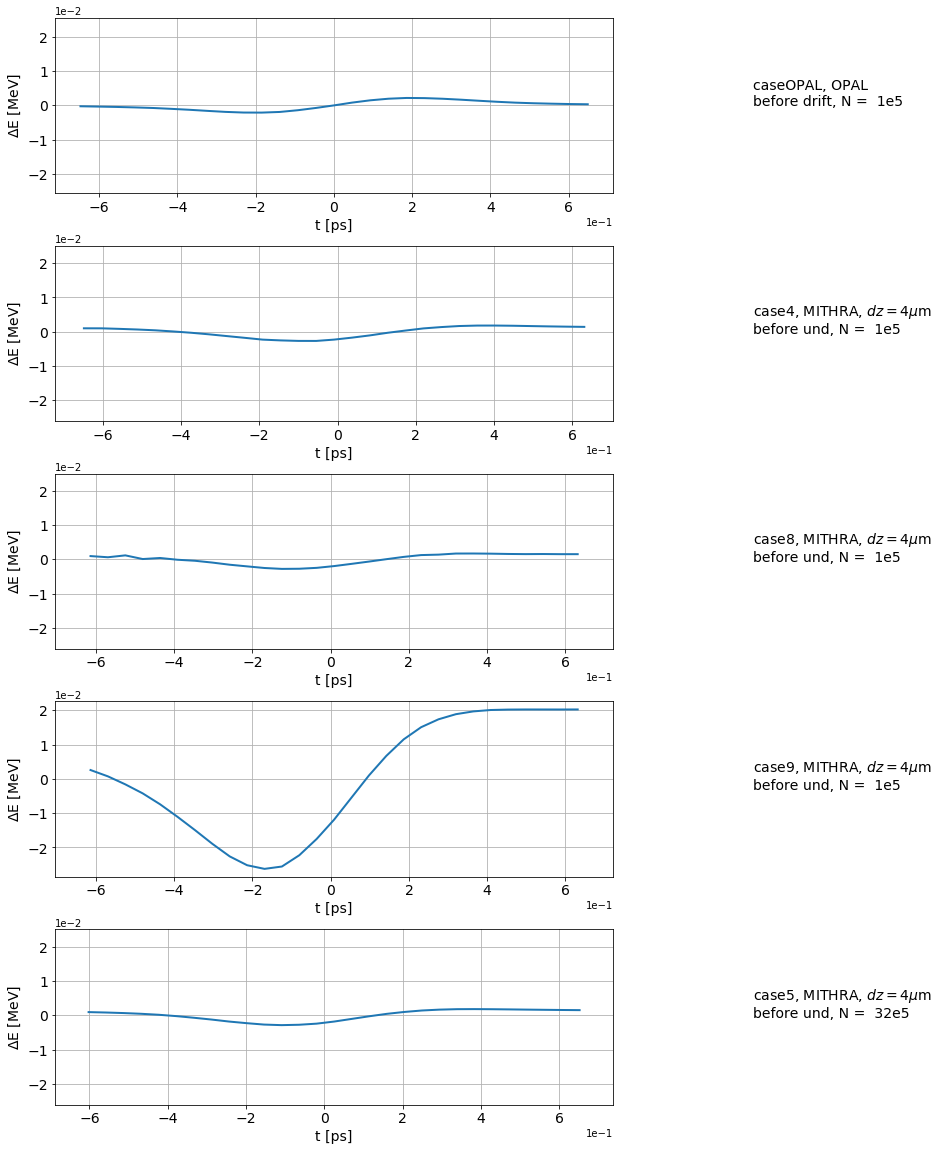

In [9]:
# All energies
fileStatic = '/SCREEN.h5'
fileFW  ='/bunch-screen/bunch-p#-screen#.txt'
qx = 't'
qy = 'E'
paramsLocal = params
# paramsLocal = paramsLocal.drop(np.arange(7,14))
# paramsLocal = paramsLocal.drop(1)
paramsLocal = paramsLocal.drop([0,1,2,3,4,5, 10, 12,13])

fig, ax = plt.subplots(paramsLocal.shape[0], sharex = False, figsize = (10, 4*paramsLocal.shape[0]))
fig.subplots_adjust(hspace = .3)
i = 0
for _,row in paramsLocal.iterrows():
    fn = 'tests/' + row['case']
    print('Plotting', fn)
    if 'OPAL' in row['case']:
        [x,y,spos] = get_screen_xy(fn, fileStatic, qx, qy, show = False, reduce_factor = 1)
    else:
        [x,y] = pmf.importScreenXY( fn + fileFW, show = False, xquant = qx, yquant = qy, index_screen = 0, reduce_factor = row['N'] / 9.9e4, sliceT = [])
    pmf.plotScreenXY(ax[i], x, y, [qx, qy], type = 'mod', factors = [-1e12,1e-6], nbins = 30, color = 1, maxHH = .2)
    ax[i].text( 1.25, .5, strParam(row), fontsize = fs, transform = ax[i].transAxes  )
    ax[i].grid()
    i += 1
pmf.adjust_axes_limits(ax, 'x')
pmf.adjust_axes_limits(ax, 'y')

# plt.savefig((pltpath + '/comparisonAfter.png'),bbox_inches='tight')


tests/case8/bunch-sampling/bunch.txt
tests/case9/bunch-sampling/bunch.txt
tests/case3/bunch-sampling/bunch.txt
tests/case7/bunch-sampling/bunch.txt
tests/case6/bunch-sampling/bunch.txt


Mesh limits z -0.0406165790990415 0.0406165790990415
Mesh limits x -0.0045 0.0045
Mesh limits y -0.01 0.01


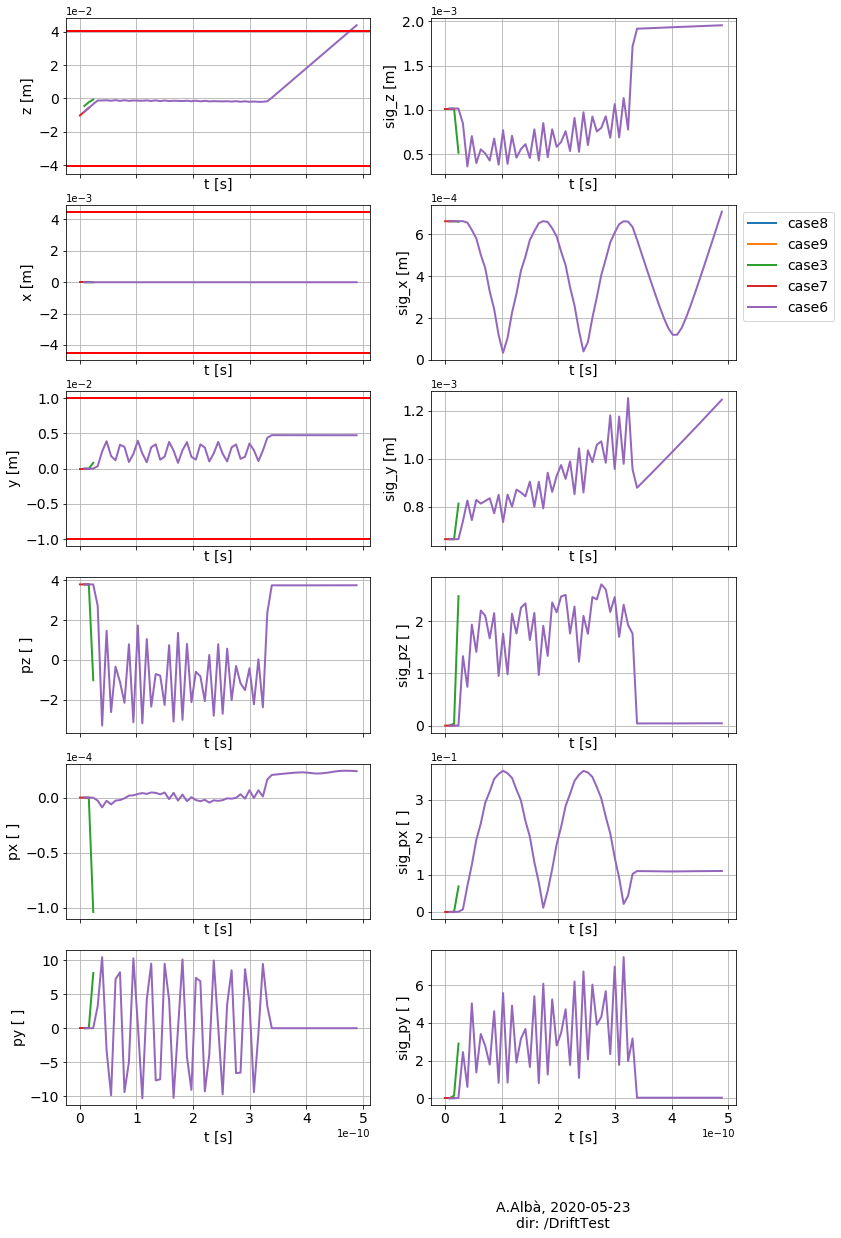

In [91]:
# Stats undulator
stats = []
leg = []
paramsLocal = params
paramsLocal = paramsLocal.drop([0,1,2,3,4,5,6, 7,11])

for _,row in paramsLocal.iterrows():
    p = 'tests/' + row['case']
    if 'OPAL' in p:
        continue
    leg.append(row['case'])
    stats.append( pmf.importStat( p + '/bunch-sampling/bunch.txt', show = True) )

names = [ 'z', 'sig_z', 'x', 'sig_x', 'y', 'sig_y',
             'pz', 'sig_pz', 'px', 'sig_px', 'py', 'sig_py']

fig, axs = plt.subplots( 6,2, figsize = ( 12, 20 ), sharex = True )
Ls = [9e-3, 20e-3, 8e-3]  # Mesh lengths
K = 10.81
E = 40  # MeV
Ls[2] *= E / .511 / np.sqrt(1 + .5 * K**2)  # * gamma_
dotted = [5,6,7]  # Indexes from fnames to plot with dotted lines
notPlot = []  # Indexes from fnames not to plot
legLocal = []
for i, ax in enumerate(axs.reshape(-1)):
    ax.grid()
    for j, stat in enumerate(stats):
        if j in notPlot:
            continue
        if j in dotted:
            ls = ':'
            lw = 3
        else:
            ls = '-'
            lw = 2
        pmf.plotStat(ax, stat, quants = ['t',names[i]], factors = [1, 1], fs = fs, lw = lw, ls = ls )
        # legLocal.append(leg[j])
        # if int(i/10) == 0:
        #     ax.set_xlabel('')
        axs[1,1].legend(leg, fontsize = fs, bbox_to_anchor = [1., 1.])
# Draw mesh limits
xyz = ['x', 'y', 'z']
for j in range(3):
    i  = (2 + j) % 3
    print('Mesh limits', xyz[i], -.5 * Ls[i], .5 * Ls[i])
    axs[j,0].axhline(-.5 * Ls[i], lw = 2, color = 'r')
    axs[j,0].axhline(.5 * Ls[i], lw = 2, color = 'r')
    # axs[j,0].set_ylim(bottom = -.5 * Ls[i], top = .5 * Ls[i])  # Mesh limits as plot limits
if not for_report:
    fig.text(.7, .04, footnote, fontsize = fs, ha='center')
# plt.savefig((pltpath + '/avg.png'),bbox_inches='tight')
plt.show()

Number of timesteps is  4
Index(['q', 'x', 'y', 'z', 'px', 'py', 'pz', 'timeStep'], dtype='object')


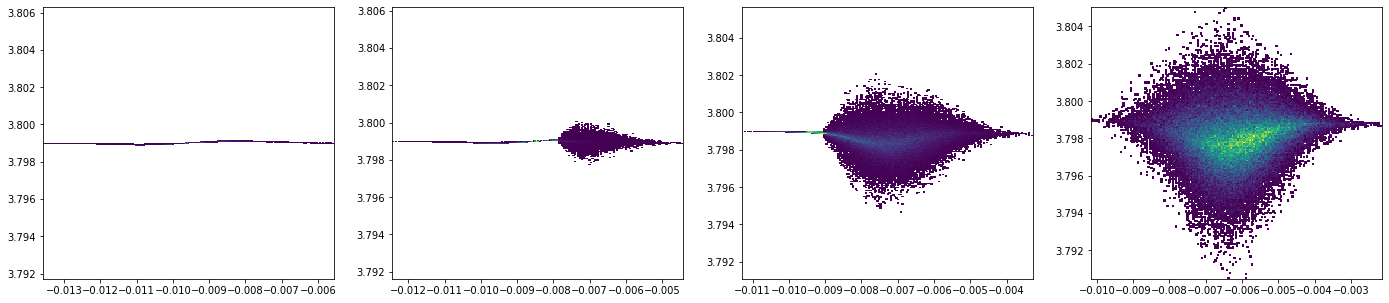

In [8]:
fileFW  ='/bunch-profile/bunch-p#-#.txt'
qx = 'z'
qy = 'pz'
[df, timesteps] = pmf.importProfile( 'tests/case8' + fileFW, show = False)
print('Number of timesteps is ', len(timesteps))
print(df.columns)

fig, ax = plt.subplots(1,len(timesteps), figsize = (len(timesteps) * 6, 5))
ax = ax.reshape(-1)
for i,s in enumerate(timesteps):
    locDf = df[df['timeStep'] == s]
    x = locDf[qx]
    y = locDf[qy]
    ax[i].hist2d(x,y, bins = 200, cmin = 1)
    # ax[i].set_ylim(bottom = 3.7987, top = 3.8002)

pmf.adjust_axes_limits(ax, 'x')
pmf.adjust_axes_limits(ax, 'y')   

plt.show()


Plotting tests/case-1


Plotting tests/caseOPAL
100000 particles has been reduced to 100000


spos =  [0.02]
Plotting tests/case3


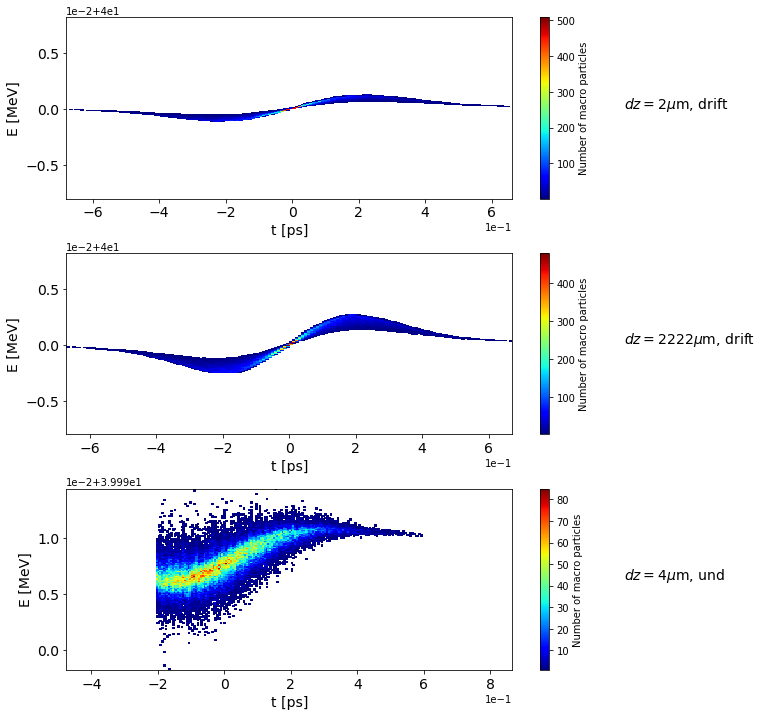

In [ ]:
# All energies
fileFW  ='/bunch-profile/bunch-p#.txt'
qx = 'z'
qy = 'pz'
paramsLocal = params
paramsLocal = paramsLocal.drop([1,2,3])

fig, ax = plt.subplots(paramsLocal.shape[0], sharex = False, figsize = (10, 4*paramsLocal.shape[0]))
fig.subplots_adjust(hspace = .3)
i = 0
for _,row in paramsLocal.iterrows():
    fn = 'tests/' + row['case']
    print('Plotting', fn)
    if 'OPAL' in row['case']:
        continue
    else:
        [x,y] = pmf.importprofile( fn + fileFW, show = False, xquant = qx, yquant = qy, index_screen = -1, reduce_factor = 1, sliceT = [])
    pmf.plotScreenXY(ax[i], x, y, [qx, qy], type = 'hist2d', factors = [-1e12,1e-6], nbins = 150, color = 1, maxHH = .3)
    ax[i].text( 1.25, .5, strParam(row), fontsize = fs, transform = ax[i].transAxes  )
    i += 1
pmf.adjust_axes_limits(ax, 'x')
pmf.adjust_axes_limits(ax, 'y')

# plt.savefig((pltpath + '/wigglerAll.png'),bbox_inches='tight')


Plotting 0
100000 particles has been reduced to 100000


spos =  [0.04]


Plotting 1
100000 particles has been reduced to 100000


spos =  [0.08]


Plotting 2
100000 particles has been reduced to 100000


spos =  [0.12]


Plotting 3
100000 particles has been reduced to 100000


spos =  [0.16]


Plotting 4
100000 particles has been reduced to 100000


spos =  [0.2]


Plotting 5
100000 particles has been reduced to 100000


spos =  [0.24]


Plotting 6
100000 particles has been reduced to 100000


spos =  [0.28]


Plotting 7
100000 particles has been reduced to 100000


spos =  [0.32]


Plotting 8
100000 particles has been reduced to 100000


spos =  [0.36]


Plotting 9
100000 particles has been reduced to 100000


spos =  [0.4]


Plotting 10
100000 particles has been reduced to 100000


spos =  [0.4]
avg E =  40000124.92225088


Plotting 11
100000 particles has been reduced to 100000


spos =  [0.4]
avg E =  40000124.92225088


Plotting 12
100000 particles has been reduced to 100000


spos =  [0.4]
avg E =  40000124.92225088


Plotting 13
100000 particles has been reduced to 100000


spos =  [0.4]
avg E =  40000124.92225088


Plotting 14
100000 particles has been reduced to 100000


spos =  [0.4]
avg E =  40000124.92225088


Plotting 15
100000 particles has been reduced to 100000


spos =  [0.4]
avg E =  40000124.92225088


Plotting 16
100000 particles has been reduced to 100000


spos =  [0.4]
avg E =  40000124.92225088


Plotting 17
100000 particles has been reduced to 100000


spos =  [0.4]
avg E =  40000124.92225088


Plotting 18
100000 particles has been reduced to 100000


spos =  [0.4]
avg E =  40000124.92225088


Plotting 19
100000 particles has been reduced to 100000


spos =  [0.4]
avg E =  40000124.92225088


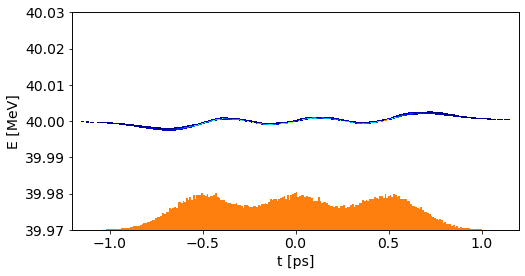

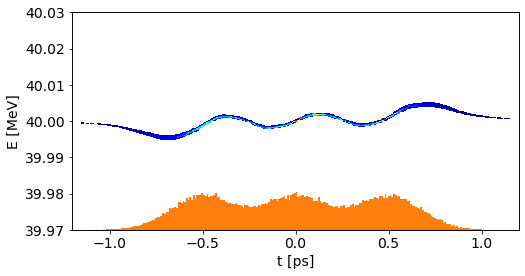

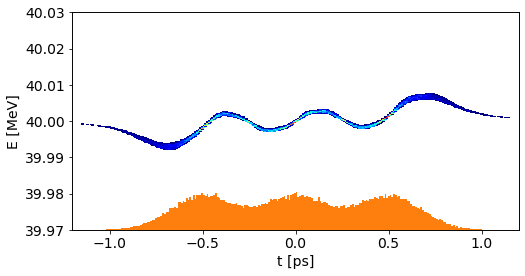

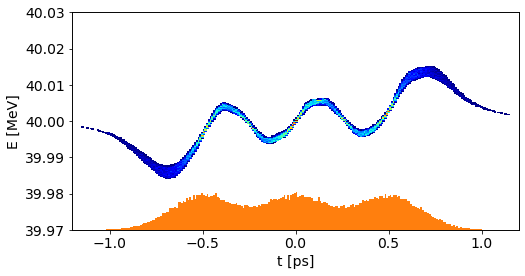

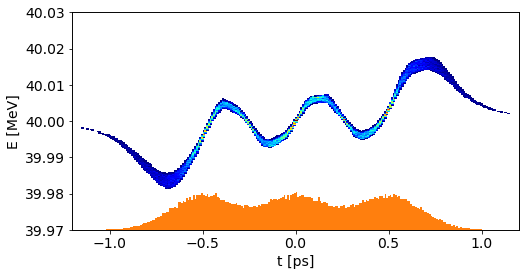

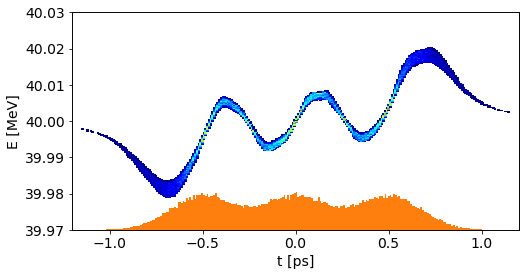

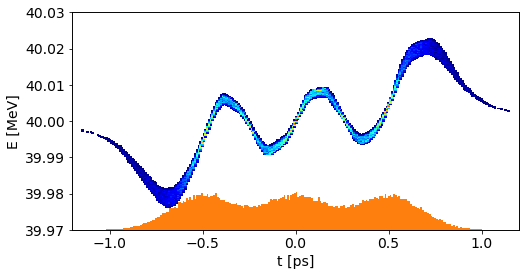

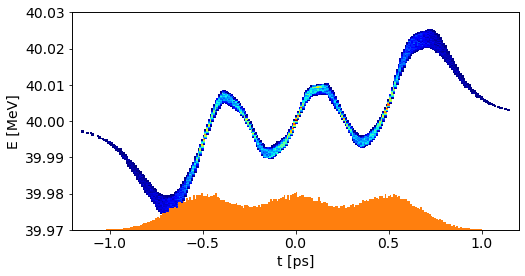

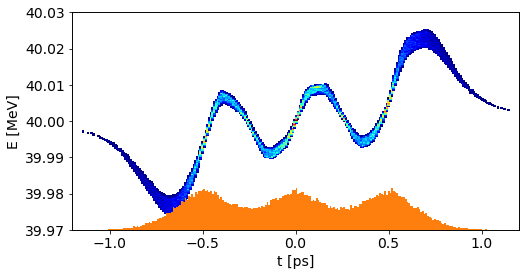

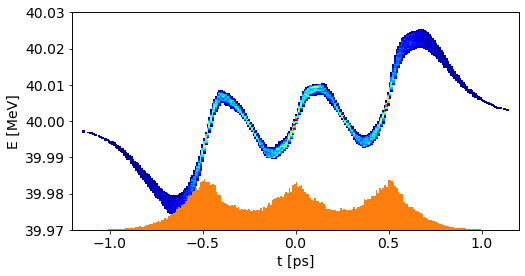

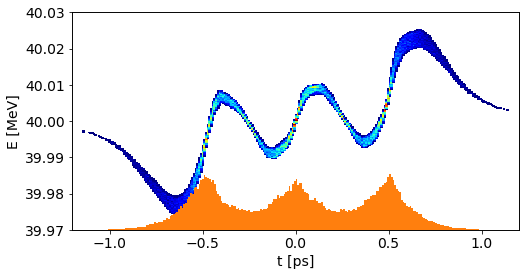

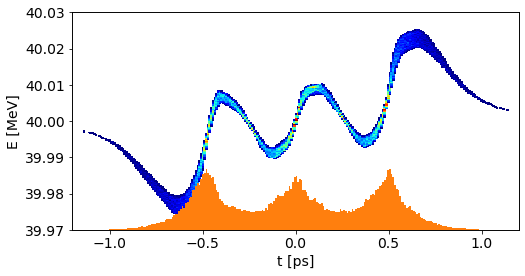

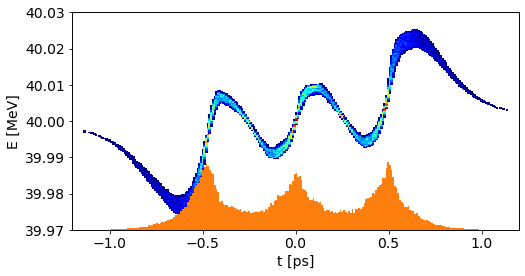

In [38]:
# Make video
N = 20
Nscreens = 10
fileStatic = '/SCREENX.h5'
qx = 't'
qy = 'E'
R56 = -1.5e-11

for i in range(N):
    fig, ax = plt.subplots(figsize = (8, 4))
    print('Plotting', i)
    if i < Nscreens:
        [x,y,spos] = get_screen_xy('tests/caseVideo/', fileStatic.replace('X', str(i+1)), qx, qy, show = False, reduce_factor = 1)
        fnvid = '/vid1Frame-' + str(i) + '.png'
    else:
        [x,y,spos] = get_screen_xy('tests/caseVideo/', fileStatic.replace('X', str(Nscreens)), qx, qy, show = False, reduce_factor = 1)
        fnvid = '/vid2Frame-' + str(i-Nscreens) + '.png'
        Eavg = np.mean(y)
        print('avg E = ', Eavg)
        for j,tj in enumerate(x):
            dE = y[j] / Eavg
            x[j] = tj - (i - Nscreens + 1) * R56 * dE
    pmf.plotScreenXY(ax, x, y, [qx, qy], type = 'hist2d-hist', factors = [-1e12,1e-6], nbins = 250, color = 1, maxHH = .2)
    ax.set_xlim(left = -1.2, right = 1.2)
    ax.set_ylim(bottom = 39.97, top = 40.03)
    plt.savefig((pltpath + fnvid),bbox_inches='tight')    

plt.show()